# A. Guidelines
## A1) Your answers
- Only include the **answers to the posed questions** into this Notebook, not some additional analysis that you may have performed.
- It is **not necessary to comment** the code or results, as long as they are correct and speak for themselves. However, commenting can sometimes be helpful to clarify why you take a particular approach, or in case you note that your results are not entirely correct.

## A2) Grading
- Correct results can be obtained in many, different ways.
- Results may potentially depend on data cleaning approach or certain assumptions. Hence, different sets of results may be counted as "correct". I will check your code, not only the output.
- Follow-up errors are not counted as errors. I will check your code, and evaluate to which degree the code is correct.

# B. Challenge

## Problem description
The topic of this challenge are countries' trade statistics. You will need to request trade data from the **Comtrade data extraction API** of the United Nations (UN) and further process, analyze and visualize the data. The following data related aspects deserve particular mention:

- **API documentation**: The UN Comtrade data extraction API is described in detail here: https://comtrade.un.org/data/doc/api. You will need to carefully study this API and the provided explanations.
- **Interactive exploration**: To better understand the data and the API parameters, you can also use the (1) [data selection interface](https://comtrade.un.org/Data/.) or (2) [run API queries interactively](https://comtrade.un.org/api/swagger/ui/index#!/Data/Data_GetData).
- **No registration**: This is a Public API. Hence, you can use the API as a guest user, i.e. without registration and authentication (which would cost money).
- **Rate limits**: Different kinds of rate limits apply, especially for guest users. For instance, you may only run one request per second. The limits are precisely described on the web site. Some of your tasks can be solved without special efforts within the given rate limits. However, some of the tasks may require that you explicitly deal with the limits. For instance, you may need to force Python to wait for 1 second before running the next request.
- **Default values**: Note that most of the parameters have a certain default value, as specified in the API documentation. If you don't explicitly define the parameter in your query, the default value is assumed. Throughout the entire notebook, you can ignore (i.e. stick to the default values of) the following parameters:
    - `fmt`: default data format is JSON.
    - `type`: default trade data type is commodity trade (as opposed to services trade)
    - `freq`: default frequency is annual data (as opposed to monthly data)
    - `px`: default classification of commodities is called HS (Harmonised System)

In [1]:
import requests
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import string
import time

import matplotlib.ticker as mtick

In [2]:
# set figure sizes https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot
sns.set(rc={'figure.figsize':(10,8)})

## 1) Ukraines Exports by Partner Country (10 points)


**Request** the total (cc='TOTAL') exports (rg=2) of reporting country Ukraine (r=804) to all available partner countries/regions (p='all') in the year 2021 (ps=2021), and turn it into a Pandas DataFrame.

In [3]:
# Request data from API
url = 'https://comtrade.un.org/api/get?r=804&ps=2021&p=all&rg=2&cc=TOTAL&fmt=json'
req = requests.get(url)
data = req.json()

In [4]:
df = pd.json_normalize(data['dataset'])

In [5]:
df.head()

,pfCode,yr,period,periodDesc,aggrLevel,IsLeaf,rgCode,rgDesc,rtCode,rtTitle,...,qtAltCode,qtAltDesc,TradeQuantity,AltQuantity,NetWeight,GrossWeight,TradeValue,CIFValue,FOBValue,estCode
0,H5,2021,2021,2021,0,0,2,Export,804,Ukraine,...,None,,0,None,NaN,None,65870275510,None,None,4
1,H5,2021,2021,2021,0,0,2,Export,804,Ukraine,...,None,,0,None,0.0,None,4553747,None,None,0
2,H5,2021,2021,2021,0,0,2,Export,804,Ukraine,...,None,,0,None,0.0,None,39768416,None,None,0
3,H5,2021,2021,2021,0,0,2,Export,804,Ukraine,...,None,,0,None,0.0,None,410228000,None,None,4
4,H5,2021,2021,2021,0,0,2,Export,804,Ukraine,...,None,,0,None,0.0,None,107648,None,None,0


**Process the DataFrame in the following way:**
- Turn the column names into lower case letters
- Keep only the following columns `yr`,`rtcode`, `rttitle`, `ptcode`, `pttitle`, `cmdcode`, `cmddesce`, `rgcode`, `rgdesc`, `tradevalue`
- Sort the data in descending order of the `tradevalue`


Then display Ukraine's top 10 export partner countries in terms of the `tradevalue`.


In [6]:
df.columns = df.columns.str.lower()
df.head(1)

,pfcode,yr,period,perioddesc,aggrlevel,isleaf,rgcode,rgdesc,rtcode,rttitle,...,qtaltcode,qtaltdesc,tradequantity,altquantity,netweight,grossweight,tradevalue,cifvalue,fobvalue,estcode
0,H5,2021,2021,2021,0,0,2,Export,804,Ukraine,...,None,,0,None,NaN,None,65870275510,None,None,4


In [7]:
df = df[["yr", "rtcode", "rttitle", "ptcode", "pttitle", "cmdcode", "cmddesce", "rgcode", "rgdesc", "tradevalue"]]
df.head(1)

,yr,rtcode,rttitle,ptcode,pttitle,cmdcode,cmddesce,rgcode,rgdesc,tradevalue
0,2021,804,Ukraine,0,World,TOTAL,All Commodities,2,Export,65870275510


In [8]:
df = df.sort_values('tradevalue', ascending=False)
df.head(10)

,yr,rtcode,rttitle,ptcode,pttitle,cmdcode,cmddesce,rgcode,rgdesc,tradevalue
0,2021,804,Ukraine,0,World,TOTAL,All Commodities,2,Export,65870275510
39,2021,804,Ukraine,156,China,TOTAL,All Commodities,2,Export,7992491765
145,2021,804,Ukraine,616,Poland,TOTAL,All Commodities,2,Export,4979134699
182,2021,804,Ukraine,792,Turkey,TOTAL,All Commodities,2,Export,3999617927
150,2021,804,Ukraine,643,Russian Federation,TOTAL,All Commodities,2,Export,3349119521
89,2021,804,Ukraine,381,Italy,TOTAL,All Commodities,2,Export,3240255598
71,2021,804,Ukraine,276,Germany,TOTAL,All Commodities,2,Export,2789957319
161,2021,804,Ukraine,699,India,TOTAL,All Commodities,2,Export,2513804631
126,2021,804,Ukraine,528,Netherlands,TOTAL,All Commodities,2,Export,2128423194
187,2021,804,Ukraine,818,Egypt,TOTAL,All Commodities,2,Export,1909977890


In [9]:
# https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

ten_p = df[df.ptcode != 0]
ten_p = ten_p[['pttitle', 'tradevalue']]
ten_p = ten_p.head(10)

# reassign index: https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
ten_p = ten_p.reset_index(drop=True)
ten_p

,pttitle,tradevalue
0,China,7992491765
1,Poland,4979134699
2,Turkey,3999617927
3,Russian Federation,3349119521
4,Italy,3240255598
5,Germany,2789957319
6,India,2513804631
7,Netherlands,2128423194
8,Egypt,1909977890
9,Spain,1639830286


**Visualize the data in the following way:**
- Visualize the exports to Ukraine's top 10 partner countries using a bar chart. Make sure that you exlude the partner country "World" from the data. Also make sure that the visualization is well readable and includes a title and axes labels.

In [10]:
barchart = ten_p
barchart['tradevalue'] = (barchart['tradevalue'] / 1000000000).round(2)

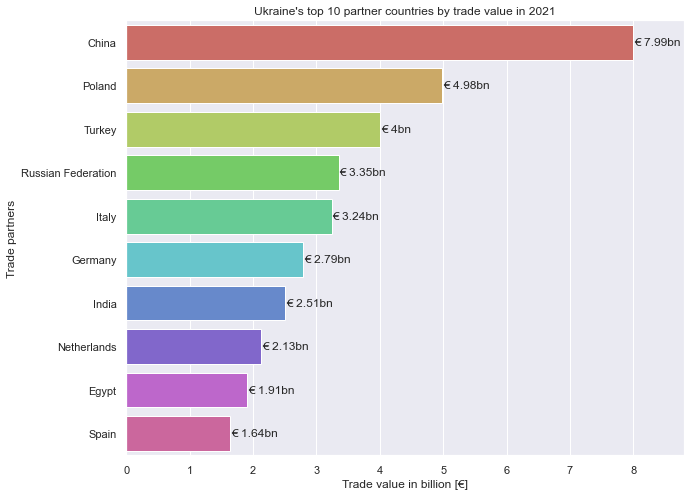

In [11]:
# Seaborn plot tutorial https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/
# ignore FutureWarning https://stackoverflow.com/questions/64130332/seaborn-futurewarning-pass-the-following-variables-as-keyword-args-x-y

ax = sns.barplot(x = 'tradevalue' , y = 'pttitle', palette = 'hls', data = barchart)
# set titles and axes labels https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot
ax.set_title("Ukraine's top 10 partner countries by trade value in 2021")
ax.set_ylabel("Trade partners")
ax.set_xlabel("Trade value in billion [€]")
ax.xaxis.grid(True)
# set bar labels https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
ax.bar_label(ax.containers[0], fmt="€ %gbn", label_type='edge', padding=1)
# save plot before showing https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
plt.xlim(0, 8.8)
plt.savefig("01_top_ten_partners.svg")
plt.show()

# I use a horizontal barchart because .. 
# Top ten ranking displayed in a ranked order, from top to bottom
# Properly sorted with "China number one" on the top
# Horizontal bars allow the recipient to easily read the countries
# Includes a vertical grid, helps recipient to see, grasp and compare bar sizes
# Color coded in a way that differentiation is obvious (China especially strikes in red)
# Numbers in billion. The total values are not as easily readable.
# I removed the scientific notation by treating the values before plotting them

# Saved as .svg, so that plot is easily scalable for documents

## 2. Ukraines Exports by Product (10 points)

**What are Ukraine's 10 most important export products in 2021? To answer the question, retrieve relevant data from the API and visualize it adequately.** 

Specifically:

- We need to agree on a common definition of products. For our purpose, set the classification code to `cc='AG4'`. This aggregation level 4 of the Harmonised System (HS) distinguishes between more than 1200 different products. (The aggregation level 2 would be more crude; the aggregation level 6 would be more detailed)
- Do not distinguish between different partner countries; we are interested in Ukraine's exports to the entire world on aggregate

In [12]:
# I reuse the same object definitions as in Exercise 1. This is intentional and for readability purposes.
# The data was taken from https://comtrade.un.org/Data/ and https://comtrade.un.org/api/swagger/ui/index#!/Data/Data_GetData


url = 'https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2021&r=804&p=0&rg=2&cc=AG4&fmt=json' 
req = requests.get(url)
data = req.json()

In [13]:
df = pd.json_normalize(data['dataset'])

In [14]:
df.columns = df.columns.str.lower()
df.head()

,pfcode,yr,period,perioddesc,aggrlevel,isleaf,rgcode,rgdesc,rtcode,rttitle,...,qtaltcode,qtaltdesc,tradequantity,altquantity,netweight,grossweight,tradevalue,cifvalue,fobvalue,estcode
0,H5,2021,2021,2021,4,0,2,Export,804,Ukraine,...,None,,0,None,437889.0,None,5903700,None,None,2
1,H5,2021,2021,2021,4,0,2,Export,804,Ukraine,...,None,,0,None,NaN,None,3750267,None,None,6
2,H5,2021,2021,2021,4,0,2,Export,804,Ukraine,...,None,,0,None,13379782.0,None,3090679,None,None,2
3,H5,2021,2021,2021,4,0,2,Export,804,Ukraine,...,None,,0,None,NaN,None,13481189,None,None,6
4,H5,2021,2021,2021,4,0,2,Export,804,Ukraine,...,None,,0,None,48191849.0,None,86788173,None,None,2


In [15]:
# Most important export products would be selected by tradevalue.
# Get commodity-descriptions and tradevalue
df = df[['cmddesce', 'tradevalue']]
df = df.sort_values('tradevalue', ascending=False)
df = df.reset_index(drop=True)
df= df[df.index < 10]
# Split string after delimiter https://stackoverflow.com/questions/40705480/python-pandas-remove-everything-after-a-delimiter-in-a-string
# This way we removed the second part of the string, which is the desce: The description.
# This also cleans the tick strings on our graphic a bit and will make it more readable
df['commodity'] = df['cmddesce'].str.split(';').str[0]

# sort columns as simple af https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
df = df.drop(columns='cmddesce')
# df = df.drop('cmddesce', 1) old, produces FutureWarning
df = df[['commodity', 'tradevalue']]
df.head(10)

,commodity,tradevalue
0,"Sun-flower seed, safflower or cotton-seed oil ...",6310573339
1,Maize (corn),5854586543
2,Wheat and meslin,4722745432
3,Rape or colza seeds,1359007550
4,Oil-cake and other solid residues,1275724580
5,Barley,1172981101
6,Meat and edible offal of poultry,702622633
7,"Soya beans, whether or not broken",621432254
8,"Tubes, pipes and hollow profiles, seamless, of...",614733962
9,"Electric water, space, soil heaters",503067432


In [16]:
barchart = df
barchart['tradevalue'] = (barchart['tradevalue'] / 1000000000).round(2)
barchart.head(10)

,commodity,tradevalue
0,"Sun-flower seed, safflower or cotton-seed oil ...",6.31
1,Maize (corn),5.85
2,Wheat and meslin,4.72
3,Rape or colza seeds,1.36
4,Oil-cake and other solid residues,1.28
5,Barley,1.17
6,Meat and edible offal of poultry,0.70
7,"Soya beans, whether or not broken",0.62
8,"Tubes, pipes and hollow profiles, seamless, of...",0.61
9,"Electric water, space, soil heaters",0.50


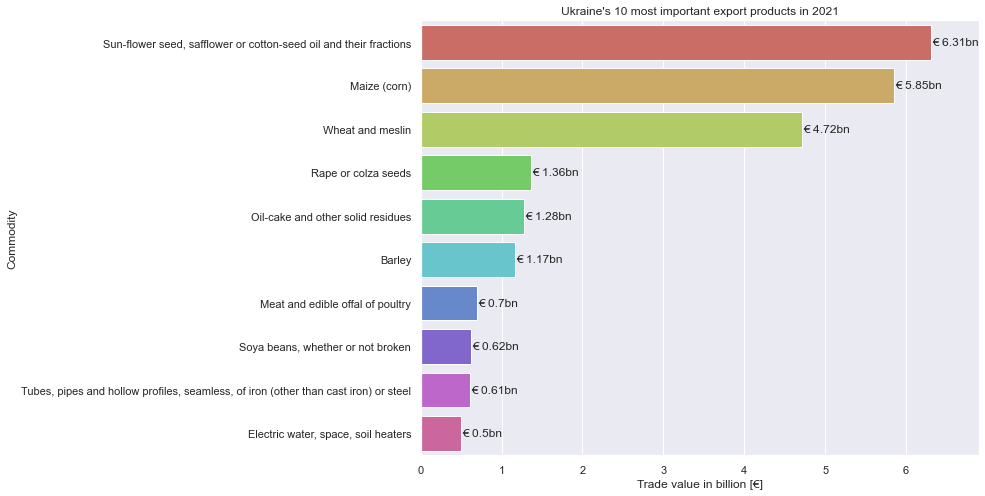

In [17]:
# I reuse a lot of the plot I built earlier because I think it was an ideal depiction of a categorial and numerical comparison
ex = sns.barplot(x = 'tradevalue' , y = 'commodity', palette = 'hls', data = barchart)
# to edit
ex.set_title("Ukraine's 10 most important export products in 2021")
ex.set_ylabel("Commodity")
ex.set_xlabel("Trade value in billion [€]")
ex.xaxis.grid(True)
ex.bar_label(ex.containers[0], fmt="€ %gbn", label_type='edge', padding=1)
plt.xlim(0, 6.9)
plt.savefig("02_top_ten_exports.svg")
plt.show()

# I use a horizontal barchart because .. 
# Top ten ranking products displayed in a ranked order, from top to bottom
# Properly sorted, deltas of amounts can easily be understood
# Horizontal bars allow the recipient to easily read the graph
# Includes a vertical grid, helps recipient to see, grasp and compare bar sizes
# Color coded in a way that differentiation is obvious
# Numbers in billion. The total values would not be as easily readable as here
# I removed the scientific notation by treating the values before plotting them

# Saved as .svg, so that plot is easily scalable for documents

## 3. Dependency of the World on Ukraine's Exports (10 points)

**Currently, many supermarkets around the globe run out of products such as "cooking oil". This is said to be a consequence of the war in Ukraine and the fact that Ukraine is supplying a significant fraction of the worlds total exports of cooking oil. Your task is to analyze this question.** 

Specifically: 

- Consider the product `cc=1512` ("Sun-flower seed, safflower or cotton-seed oil and their fractions; whether or not refined, but not chemically modified")
- Retrieve the exports of this product of each individual country x to the entire World
- Calculate what fraction of the total exports is due to country x
- Visualize these fractions for the top 10 exporter countries.

In [18]:
# Situations change around the globe rapidly.
# Among the students we discussed actively whether to use averages of several years (specifically 2021 to 2019)
# I decided to go with 2021 for the following reasons:
# The drop-off in Ukraine's exports in 2022 is chained chronologically to year 2021.
# We are to report on the status as-is by using the latest information available, which is 2021, not on a trend.
# Taking data from 2020 or even back from 2019 would also carry the information of the dependency from 2020 and 2019, which
# may not be true today because: Ukraine or other countries may have invested or been invested to regarding this product class,
# as late as 2020 or 2021, hence changing the playing field.
# That is why their production capacity from 2021 indeed displays the latest state and thus the truest state to what affects us today.
# api call /api/get?max=502&type=C&freq=A&px=HS&ps=2021&r=all&p=0&rg=2&cc=1512

url = 'https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2021&r=all&p=0&rg=2&cc=1512&fmt=json'
req = requests.get(url)
data = req.json()
df = pd.json_normalize(data['dataset'])
df.columns = df.columns.str.lower()
df.head(1)

,pfcode,yr,period,perioddesc,aggrlevel,isleaf,rgcode,rgdesc,rtcode,rttitle,...,qtaltcode,qtaltdesc,tradequantity,altquantity,netweight,grossweight,tradevalue,cifvalue,fobvalue,estcode
0,H5,2021,2021,2021,4,0,2,Export,31,Azerbaijan,...,None,,11134326,None,11134326.0,None,14266469,None,None,0


In [19]:
# We sort by tradequantity. Why by tradequantity, not by tradevalue? Tradevalue is based on price, which is elastic based on many factors, 
# even arbitrary ones like origin or the brand.
# However, we are answering questions about **scarcity** here. Tonnage is the **hard** contribution of x country to the world for 1512.
# A question remains: Are the three mentioned products in 1512 comparable, and do they differentiate by refined vs not refined?
# In reality they are true substitutes to each other, whether refined or not refined. Hence they are regarded as one product by the UN.
# Note: 'tradequantity' is normed and normalized by the "Quantity of Unit" factor, hence equal to 'netweight' here. It's displayed cleaner.
df = df.sort_values('tradequantity', ascending=False)
df = df.reset_index(drop=True)
df.head(3)

,pfcode,yr,period,perioddesc,aggrlevel,isleaf,rgcode,rgdesc,rtcode,rttitle,...,qtaltcode,qtaltdesc,tradequantity,altquantity,netweight,grossweight,tradevalue,cifvalue,fobvalue,estcode
0,H5,2021,2021,2021,4,0,2,Export,804,Ukraine,...,None,,5161205431,None,5.161205e+09,None,6310573339,None,None,0
1,H5,2021,2021,2021,4,0,2,Export,528,Netherlands,...,None,,666322484,None,6.663225e+08,None,849481155,None,None,6
2,H5,2021,2021,2021,4,0,2,Export,792,Turkey,...,None,,635220879,None,6.352209e+08,None,937160152,None,None,0


In [20]:
# calculate the total trade quantity of 1512
total = df['tradequantity'].sum()
# print(total)

# divide df by another while keeping indices https://stackoverflow.com/questions/64723890/pandas-divide-dataframe-by-another-based-on-column-values
# I want to get a clean fraction right away. The calculation is easy enough to keep it in one line.
df['fraction'] = df['tradequantity'].div(total)

In [21]:
# Preparing for visuals, I drop everything beside the 10 top countries to reduce calculations and tidy and clean up a bit
barchart = df
barchart= barchart[barchart.index < 10]
barchart = barchart[['rttitle', 'fraction']]
barchart['fraction'] = (barchart['fraction'] * 100).round(2)
barchart['rttitle'] = barchart['rttitle'].str.split('(').str[0]
barchart.head(10)

,rttitle,fraction
0,Ukraine,65.27
1,Netherlands,8.43
2,Turkey,8.03
3,Romania,2.45
4,Germany,2.45
5,Serbia,1.88
6,Belgium,1.66
7,USA,1.21
8,Bolivia,1.17
9,Rep. of Moldova,1.16


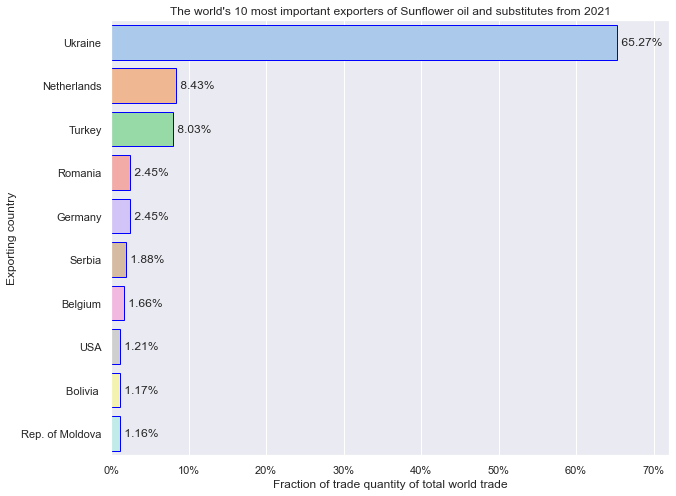

In [22]:
# Now we build a beautiful graph. The reasons that this is a chart for 2021, and not a timeline
# or a mix of input data has been mentioned and explained by reasons in the first code cell of this exercise.
# A timeline was not asked for, and a barchart offers easier readability for numerical + categorial values.
de = sns.barplot(x = 'fraction' , y = 'rttitle', palette = 'pastel', edgecolor='blue', data = barchart)
# add percents to the graphs!
# beautify! different colors!
de.set_title("The world's 10 most important exporters of Sunflower oil and substitutes from 2021")
de.set_ylabel("Exporting country")
de.set_xlabel("Fraction of trade quantity of total world trade")
de.xaxis.grid(True)
de.bar_label(de.containers[0], fmt=" %g%%", label_type='edge', padding=1)
de.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlim(0, 72)
plt.savefig("03_top_ten_contributers.svg")
plt.show()

## 4. Dependency of the World Function (10 points)

**Create a Python function `world_dependency_plot` that is able to answer the previous question - as well as corresponding questions for different products and different years**.

Specifically,  

- the function should have the following two input parameters: 
    - `cc`: single product code (e.g. 1512)
    - `ps`: single year (e.g. 2021)
- the function should return a visualization as specified in the previous exercise
- the title of the visualization should contain the product name
- the function should include a docstring that details what the function does, and what it's inputs and outputs are.

Test your function using `world_dependency_plot(ps=2020, cc=8703)`

In [25]:
# build basic function -- check
# adjust function that it answers the previous question with fixed variables -- check
# later adjust function so that variables can be replaced, set for point by point as mentioned: -- check
# 1 -- check
# 2 -- check
# 3 title -- check
# 4 docstring -- check

def world_dependency_plot(ps=2021, cc=1512):
    '''This function 'world_dependency_plot' displays the dependency of the world upon the manufacturing country of a chosen type of product.
It calculates the fractions of a tradevalue of country x by the total worldwide tradevalue of the commodity's exports.
Inputs;
    ps : int ; the requested year, e.g. 1990 or 2020,
    cc : int ; the HS commodity code, e.g. 14 or 1401 or 140120.
A list of HS commodity codes with a search function can be found here: https://www.foreign-trade.com/reference/hscode.htm
Output;
    A barchart of the products' top ten exporters to the world.
Attention! Please do not execute this function more than once per second due to API limitations.
    '''
    # logic
    url = f"https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps={ps}&r=all&p=0&rg=2&cc={cc}&fmt=json"
    req = requests.get(url)
    data = req.json()
    df = pd.json_normalize(data['dataset'])
    df.columns = df.columns.str.lower()
    df = df.sort_values('tradevalue', ascending=False)
    df = df.reset_index(drop=True)
    total = df['tradevalue'].sum()
    df['fraction'] = df['tradevalue'].div(total)
    df['commodity'] = df['cmddesce'].str.split(';').str[0]
    commodity = df['commodity'].iloc[0]
    # copy into new dataframe for calculations (not necessary here but reloading from df is useful in case calculations repeat)
    barchart = df
    barchart= barchart[barchart.index < 10]
    barchart = barchart[['rttitle', 'fraction']]
    barchart['fraction'] = (barchart['fraction'] * 100).round(2)
    barchart['rttitle'] = barchart['rttitle'].str.split('(').str[0]
    # plot
    ax = sns.barplot(x = 'fraction' , y = 'rttitle', palette = 'pastel', edgecolor='black', data = barchart)
    ax.set_title(f"The world's 10 most important exporters of {commodity} from {ps}")
    ax.set_ylabel("Exporting country")
    ax.set_xlabel("Fraction of trade quantity of total world trade")
    ax.xaxis.grid(True)
    ax.bar_label(ax.containers[0], fmt=" %g%%", label_type='edge', padding=1)
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    #plt.xlim(0, 72)
    plt.savefig("04_top_ten_exporters.svg")
    plt.show()
    return

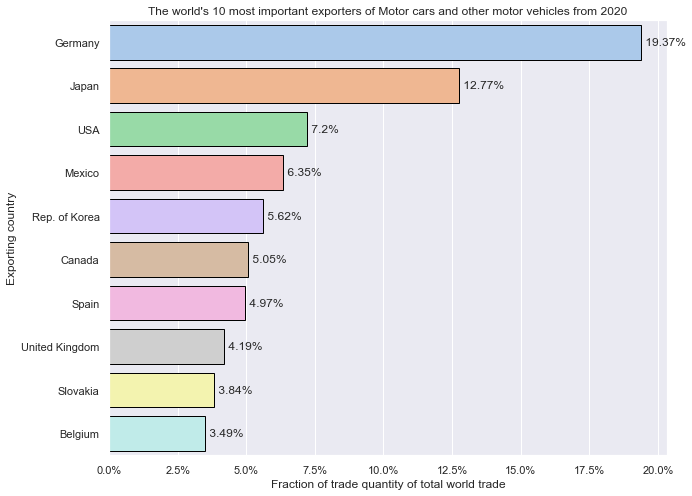

This function 'world_dependency_plot' displays the dependency of the world upon the manufacturing country of a chosen type of product.
It calculates the fractions of a tradevalue of country x by the total worldwide tradevalue of the commodity's exports.
Inputs;
    ps : int ; the requested year, e.g. 1990 or 2020,
    cc : int ; the HS commodity code, e.g. 14 or 1401 or 140120.
A list of HS commodity codes with a search function can be found here: https://www.foreign-trade.com/reference/hscode.htm
Output;
    A barchart of the products' top ten exporters to the world.
Attention! Please do not execute this function more than once per second due to API limitations.
    


In [26]:
world_dependency_plot(2020, 8703)
print(world_dependency_plot.__doc__)

## 5. Requesting data for many years (10 points)

The API poses some limitations:

- The Comtrade API only allows querying data for up to 5 years per API request. 
- Another problem is that you have to provide one string containing comma-separated values. (For instance, you can set `ps='2010,2011,2012,2013,2014').` 
- Another problem is that only 1 request per second can be carried out.

**Write a Python function `comtrade_many_years` that is able to download and process data for an arbitrary number of years. This implies that you need to split the desired request into multiple requests, the results of which are finally concatenated to one large dataset.**

Specifically, 

- the function must accept a list, tuple or range of years as input (e.g. `[2010, 2015, 2020]` or `range(2000, 2021)`) and no limitations should be placed on the number of requestable years.
- the function must also accept the parameters `r` (reporting country), `p` (partner country, `cc` (classification code) and `rg` (trade regime), but here the standard Comtrade rate limits and formatting rules may apply
- the function should return 1 "long" dataset that contains data for all requested years.
- the function should include a docstring that details what the function does, and what it's inputs and outputs are.

Test your function using: `comtrade_many_years(ps=range(2010,2020), r=276, p='all', cc='TOTAL', rg=2)`

In [32]:
# string issue for ps solved --check
# time limit issue solved --check
# accept list, tuple or range of years, no limitations on total number of years --check
# the function must accept also params r, p, cc, rg ---check
# function should return full dataset that contains data for all requested years --check
# function should include docstring that details it -- check (almost forgot, hah!)
# test of function with (ps=range(2010,2020), r=276, p='all', cc='TOTAL', rg=2) --check

def comtrade_many_years(ps, r, p, cc, rg):
    '''This function 'comtrade_many_years' can serialize API calls to the UN Comtrade Database and packs the results into one large dataframe.
The function requires several inputs:
    ps : a list, a tuple or a range ; years requested
    r : int ; reporting country, please use country id found here: https://comtrade.un.org/Data/cache/reporterAreas.json ,
    p : int ; partner country, please use country id (see above),
    cc : int ; commodity code, please refer to the HS commodity codes found via search here: https://www.foreign-trade.com/reference/hscode.htm ,
    rg : int ; trade regime or trade flow.
The function gives output:
    Concetenated dataframe of the requested years containing all information ready for further processing.
This function processes by 1 second per year requested due to API limitations. A more performant function using a chunker could get built, but is more complex.
    '''
    years = list(ps)
    print(years)
    times = (len(years))
    print("A total of ", times, " years will be requested.")
    appended_data = []
    for i in ps:
        url = f"https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps={i}&r={r}&p={p}&rg={rg}&cc={cc}&fmt=json"
        print(i, ": ", url)
        req = requests.get(url)
        data = req.json()
        df = pd.json_normalize(data['dataset'])
        appended_data.append(df)
        time.sleep(1)
    df_full=pd.concat(appended_data)
    print(df_full.head())
    return

comtrade_many_years(ps=range(2010,2020), r=276, p='all', cc='TOTAL', rg=2)
print(comtrade_many_years.__doc__)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
A total of  10  years will be requested.
2010 :  https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2010&r=276&p=all&rg=2&cc=TOTAL&fmt=json
2011 :  https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2011&r=276&p=all&rg=2&cc=TOTAL&fmt=json
2012 :  https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2012&r=276&p=all&rg=2&cc=TOTAL&fmt=json
2013 :  https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2013&r=276&p=all&rg=2&cc=TOTAL&fmt=json
2014 :  https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2014&r=276&p=all&rg=2&cc=TOTAL&fmt=json
2015 :  https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2015&r=276&p=all&rg=2&cc=TOTAL&fmt=json
2016 :  https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2016&r=276&p=all&rg=2&cc=TOTAL&fmt=json
2017 :  https://comtrade.un.org/api/get?max=502&type=C&freq=A&px=HS&ps=2017&r=276&p=all&rg=2&cc=TOTAL&fmt=json
2018 :  ht

In [ ]:
# A more performant option taking chunks of 5 each
# 
# Can download and process multiple requests
# Must accept list "[]"--check , tuple "()"--check or range "range()""--check
# turn ps into list--check
# split list into chunks of 5 --check
# count number of lists, will be numbers of iterations --check
# for each iteration:
#       turn each list into a string:
#           each element must be written into a string separated by commas
#       pass string to get.request each iteration
# Must be able to concatenate the data
# Must accept parameters r, p, cc, rg
# Return 1 long dataset with all data
# Must include docstring


#chunker zum Teilen der lists https://stackoverflow.com/questions/434287/what-is-the-most-pythonic-way-to-iterate-over-a-list-in-chunks
#def chunker(seq, size):
#    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

# to optimize performance we could use a chunker
#lst=[]
#    for group in chunker(years, 5):
#        # print(group)
#        lst.append(group) # https://stackoverflow.com/questions/39322625/how-to-put-python-loop-output-in-a-list
#    repet = len(lst) # repetitions for the iteration
#    print(repet)
#    print(lst)
#    for i, value in enumerate(lst): #iterate through alphabet https://stackoverflow.com/questions/47584845/how-to-split-up-a-list-of-lists-python
#        globals()[string.ascii_lowercase[i]] = value #value is our j https://stackoverflow.com/questions/17182656/how-do-i-iterate-through-the-alphabet
